<a href="https://colab.research.google.com/github/carnival77/Machine_Learning/blob/master/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Plot the training data**



*   plot the training data points (x,y)(x, y)(x,y) with their labels lll in colors (blue for label 0 and red for label 1)


1. Training Data

*   load the training data file ('data.txt')

*   each row {(x(i),y(i),l(i))}\{ (x^{(i)}, y^{(i)}, l^{(i)}) \}{(x(i),y(i),l(i))} of the data consists of a 2-dimensional point (x,y)(x, y)(x,y) with its label lll


*   x,y∈Rx, y \in \mathbb{R}x,y∈R and l∈{0,1}l \in \{0, 1\}l∈{0,1}




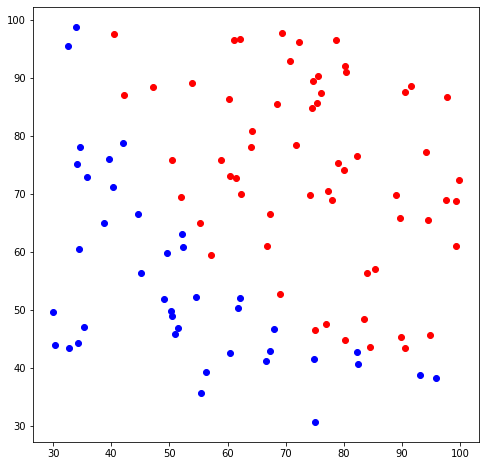

In [504]:
import numpy as np
import matplotlib.pyplot as plt
import csv

data    = np.genfromtxt("/content/drive/My Drive/Colab Notebooks/assignment5/data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, c='b')
plt.scatter(x_label1, y_label1,c='r')
plt.show()


#**2. Plot the estimated parameters**



*   plot the estimated parameters (θ0,θ1,θ2) at every iteration of gradient descent until convergence
*   the colors for the parameters (θ0,θ1,θ2) should be red, green, blue, respectively



2. Logistic regression



theta 초기값

 theta_0 : 2.0

 theta_1 : 4.0
 
 theta_2 : 6.0

In [0]:
theta_0 = 2.0
theta_1 = 4.0
theta_2 = 6.0

z=θ0+θ1x+θ2yz where θ0,θ1,θ2∈R



In [0]:
z = theta_0 + theta_1*x + theta_2 *y

# print(z)

sigmoid : σ(z)=1/(1+exp(−z))

In [0]:
sigmoid = 1/(1+np.exp(-z))

np.set_printoptions(precision=3)

3. Objective Function

OF = objective function
J(θ0​,θ1​,θ2​)=m1​∑i=1m​(−l(i)log(σ(z(i)))−(1−l(i))log(1−σ(z(i))))

4. Gradient Descent

gradient_theta_0 : 

θ0(t+1)​:=θ0(t)​−αm1​∑i=1m​(σ(z(i))−l(i))

gradient_theta_1 :

θ1(t+1)​:=θ1(t)​−αm1​∑i=1m​(σ(z(i))−l(i))x(i)

gradient_theta_2 : 

θ2(t+1)​:=θ2(t)​−αm1​∑i=1m​(σ(z(i))−l(i))y(i)

m = number of data

steps = 5000 번의 학습 사이클. 

learning_rate = 0.0005

In [0]:
m = len(x)
steps = 5000
learning_rate = 0.0005

In [509]:
arr_theta_0=[]
arr_theta_1=[]
arr_theta_2=[]
arr_OF=[]

theta_0 = 2.0
theta_1 = 4.0
theta_2 = 6.0

# print(label)

for i in range(steps):
  z = theta_0 + theta_1*x + theta_2 *y
  sigmoid = 1/(1+np.exp(-z))

  OF = np.sum((-label * np.log(sigmoid)) - ((1-label) * np.log(1-sigmoid)))/(m)

  gradient_theta_0 = np.sum(sigmoid - label)/m
  gradient_theta_1 = np.sum((sigmoid - label) * x)/m
  gradient_theta_2 = np.sum((sigmoid - label) * y)/m

  arr_theta_0.append(theta_0)
  arr_theta_1.append(theta_1)
  arr_theta_2.append(theta_2)
  arr_OF.append(OF)
  
  theta_0 -= learning_rate*gradient_theta_0
  theta_1 -= learning_rate*gradient_theta_1
  theta_2 -= learning_rate*gradient_theta_2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


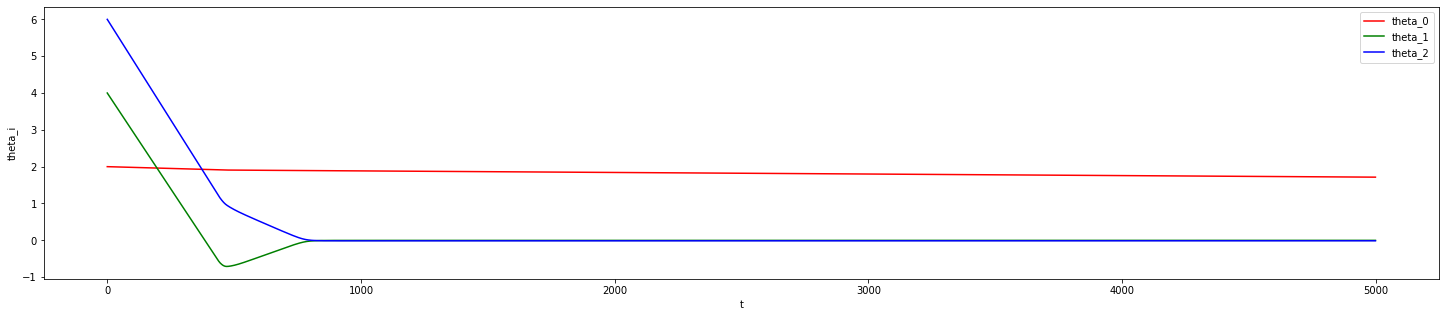

In [510]:

test0=np.array(arr_theta_0,dtype=float)
test1=np.array(arr_theta_1,dtype=float)
test2=np.array(arr_theta_2,dtype=float)

t=np.arange(0,5000,step=1)

plt.figure(figsize=(25, 5))
plt.xlabel('t')
plt.ylabel('theta_i')
plt.plot(t,test0,color="red",label="theta_0")
plt.plot(t,test1,color="green",label="theta_1")
plt.plot(t,test2,color="blue",label="theta_2")

plt.legend()
plt.show()

#**3. Plot the training error**



*   plot the training error J(θ0,θ1,θ2) at every iteration of gradient descent until convergence (in blue color)



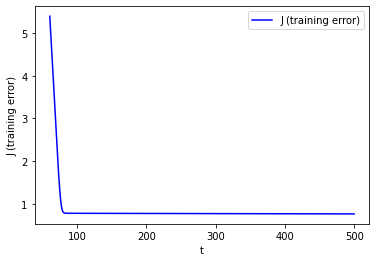

In [511]:
test5=np.array(arr_OF,dtype=float)

t=np.arange(0,500,step=0.1)

plt.xlabel('t')
plt.ylabel('J (training error)')

plt.plot(t,test5,color="blue",label="J (training error)")

plt.legend()
plt.show()

#**4. Plot the obtained classifier**



*   plot the classifier σ(z) where z=θ0+θ1x+θ2y with x=[30:0.5:100]x and y=[30:0.5:100]

*   [a:t:b]denotes a range of values from a to b with a stepsize t

*   use a colormap where blue is used for 0, red is used for 1, their weighted combination for a value between 0 and 1

*   plot the training data points (x,y)(x, y)(x,y) with their labels lll in colors (blue for label 0 and red for label 1) superimposed on the classifier

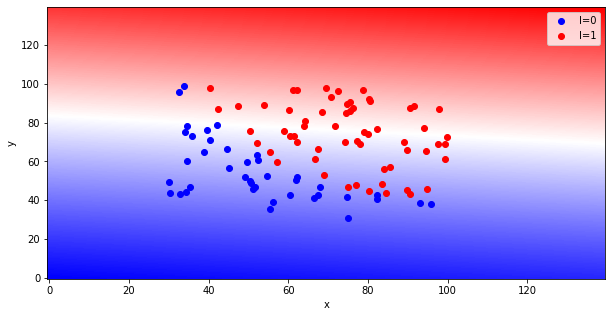

In [512]:
import matplotlib as mpl
import matplotlib.colors as colors

x_axis =y_axis= np.arange(30,100,step=0.5)

X,Y = np.meshgrid(x_axis,y_axis)

z = theta_0 + theta_1*X + theta_2 *Y

sigmoid = 1/(1+np.exp(-z))

fig, ax = plt.subplots(1)

ax.imshow(sigmoid,aspect='auto',origin='lower',cmap="bwr_r") 

fig.set_size_inches(10,5)

plt.xlabel('x')
plt.ylabel('y')

plt.scatter(x_label0, y_label0,label="l=0", c='b')
plt.scatter(x_label1, y_label1,label="l=1", c='r')

plt.legend()
plt.show()